<a href="https://colab.research.google.com/github/soeun727/AI-Project-loan_payment/blob/main/Loan_Data_Classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **데이터 학습 - SVM**
- StandardScaler()를 사용하여 스케일링
- SVM 모델 학습
- 오차행렬 결과 출력

**▼ SVM(Support Vector Machine)의 개념**
- 분류 문제에 사용하는 기계학습 알고리즘
- 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델

In [222]:
# 원본 데이터 불러오기
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI test/loan_payment analysis/Loan payments data_PreProcessed.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns

,loan_status,Principal,terms,age,education,Gender
0,0,1000,30,45,0,1
1,0,1000,30,50,2,0
2,0,1000,30,33,2,0
3,0,1000,15,27,1,1
4,0,1000,30,28,1,0


In [223]:
# y, 즉 예측값이 loan_status일 때
from sklearn.model_selection import train_test_split

X = df.iloc[1:501,1:].values
y = df.iloc[1:501,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print(X_test)
print(X_train)
print(y_test)

[[1000   30   38    0    1]
 [1000   15   25    1    1]
 [1000   30   37    1    1]
 [1000   30   38    0    1]
 [1000   15   29    1    1]
 [1000   30   33    1    1]
 [1000   15   26    2    1]
 [1000   30   27    0    1]
 [ 800   15   32    1    1]
 [ 300    7   29    1    1]
 [1000   30   30    1    1]
 [ 800   30   23    1    0]
 [1000   30   41    0    1]
 [1000   30   27    0    0]
 [1000   30   30    1    1]
 [1000   30   28    0    1]
 [1000   15   37    1    1]
 [1000   30   37    1    1]
 [1000   15   47    0    1]
 [1000   30   38    0    1]
 [1000   15   24    0    1]
 [1000   15   30    1    0]
 [1000   30   30    0    1]
 [1000   15   34    1    1]
 [ 800   15   24    0    1]
 [1000   30   33    0    1]
 [1000   30   18    1    1]
 [1000   30   30    1    1]
 [1000   30   37    1    0]
 [1000   30   43    2    1]
 [1000   30   26    1    0]
 [1000   30   35    1    1]
 [ 800   15   35    1    1]
 [1000   15   27    1    1]
 [1000   30   30    0    0]
 [1000   30   28    

In [224]:
# Scaling을 수행하지 않고 학습
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_rbf_model_before_scale = svm.SVC(kernel='rbf')
SVM_rbf_model_before_scale.fit(X_train,y_train)

svc_rbf_prediction_before_scale = SVM_rbf_model_before_scale.predict(X_test)

In [225]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_rbf_model_after_scale = svm.SVC(kernel='rbf')
SVM_rbf_model_after_scale.fit(X_train_scaled,y_train)
svc_rbf_prediction_after_scaled = SVM_rbf_model_after_scale.predict(X_test_scaled)

In [226]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_rbf_prediction_before_scale,y_test))
before_scaling_report = classification_report(y_test,svc_rbf_prediction_before_scale)
print(before_scaling_report)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_rbf_prediction_after_scaled ,y_test))
after_scaling_report = classification_report(y_test,svc_rbf_prediction_after_scaled)
print(after_scaling_report)


SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150

SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [227]:
# Scaling 수행 전 데이터셋 정확도
print("<Scaling 전>")
print("훈련 세트 정확도: {:.3f}".format(SVM_rbf_model_before_scale.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(SVM_rbf_model_before_scale.score(X_test, y_test)))
print()
# Scaling 수행 전 데이터셋 정확도
print("<Scaling 후>")
print("훈련 세트 정확도: {:.3f}".format(SVM_rbf_model_after_scale.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(SVM_rbf_model_after_scale.score(X_test, y_test)))

<Scaling 전>
훈련 세트 정확도: 0.596
테스트 세트 정확도: 0.607

<Scaling 후>
훈련 세트 정확도: 0.596
테스트 세트 정확도: 0.607


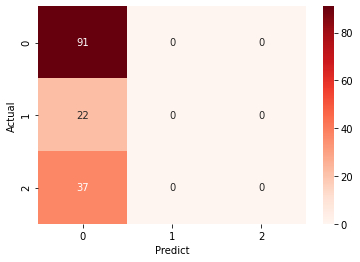

In [228]:
# 오차행렬 시각화 - Scaling 전
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, svc_rbf_prediction_before_scale), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

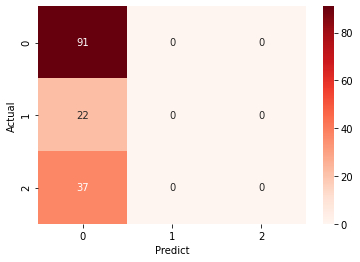

In [229]:
# 오차행렬 시각화 - Scaling 후
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, svc_rbf_prediction_after_scaled), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()


→ 결과 : **60%**의 정확도, Scaling 수행 여부가 정확도에 영향을 미치지 않음

# **past_due_days** 열을 추가하여 학습

---





In [230]:
# 원본 데이터 불러오기
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI test/loan_payment analysis/Loan payments data_원본.csv")
#df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [231]:
# 사용하지 않을 열 삭제(past_due_days 제외)
df.drop(['Loan_ID', 'effective_date', 'due_date' , 'paid_off_time'] ,axis = 1, inplace = True)
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,NaN,27,college,male
4,PAIDOFF,1000,30,NaN,28,college,female


In [232]:
#문자열 변환
df["loan_status"]= df["loan_status"].replace(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'],["0","1","2"])
df["education"]= df["education"].replace(['High School or Below', 'college', 'Bechalor', 'Master or Above'],["0","1","2","3"])
df["Gender"]= df["Gender"].replace(['female', 'male'],["0","1"])
df

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,0,1000,30,NaN,45,0,1
1,0,1000,30,NaN,50,2,0
2,0,1000,30,NaN,33,2,0
3,0,1000,15,NaN,27,1,1
4,0,1000,30,NaN,28,1,0
...,...,...,...,...,...,...,...
495,2,1000,30,3.0,28,0,1
496,2,1000,15,14.0,26,0,1
497,2,800,15,3.0,30,1,1
498,2,1000,30,1.0,38,1,0


In [233]:
#past_due_days 처리
df['past_due_days'].unique()
df["past_due_days"]= df["past_due_days"].fillna(0)
df["past_due_days"]= df["past_due_days"].replace([  76., 61., 75., 60., 59., 74., 29., 44., 58., 73., 28.,  2.,
        4., 13.,  5.,  3., 12., 27.,  1., 25., 24., 36.,  7., 14., 23.,
        6., 38., 19., 52., 51.,  9., 56.,  8.], "1")
df

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,0,1000,30,0,45,0,1
1,0,1000,30,0,50,2,0
2,0,1000,30,0,33,2,0
3,0,1000,15,0,27,1,1
4,0,1000,30,0,28,1,0
...,...,...,...,...,...,...,...
495,2,1000,30,1,28,0,1
496,2,1000,15,1,26,0,1
497,2,800,15,1,30,1,1
498,2,1000,30,1,38,1,0


In [234]:
df.dropna(inplace = True)
df

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,0,1000,30,0,45,0,1
1,0,1000,30,0,50,2,0
2,0,1000,30,0,33,2,0
3,0,1000,15,0,27,1,1
4,0,1000,30,0,28,1,0
...,...,...,...,...,...,...,...
495,2,1000,30,1,28,0,1
496,2,1000,15,1,26,0,1
497,2,800,15,1,30,1,1
498,2,1000,30,1,38,1,0


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   loan_status    500 non-null    object
 1   Principal      500 non-null    int64 
 2   terms          500 non-null    int64 
 3   past_due_days  500 non-null    object
 4   age            500 non-null    int64 
 5   education      500 non-null    object
 6   Gender         500 non-null    object
dtypes: int64(3), object(4)
memory usage: 31.2+ KB


In [236]:
# y, 즉 예측값이 loan_status일 때
from sklearn.model_selection import train_test_split

X = df.iloc[1:501,1:].values
y = df.iloc[1:501,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print(X_test)
print(X_train)
print(y_test)

[[1000 30 '1' 38 '0' '1']
 [1000 15 0.0 25 '1' '1']
 [1000 30 0.0 37 '1' '1']
 [1000 30 0.0 38 '0' '1']
 [1000 15 0.0 29 '1' '1']
 [1000 30 '1' 33 '1' '1']
 [1000 15 0.0 26 '2' '1']
 [1000 30 0.0 27 '0' '1']
 [800 15 '1' 32 '1' '1']
 [300 7 0.0 29 '1' '1']
 [1000 30 0.0 30 '1' '1']
 [800 30 0.0 23 '1' '0']
 [1000 30 '1' 41 '0' '1']
 [1000 30 0.0 27 '0' '0']
 [1000 30 0.0 30 '1' '1']
 [1000 30 '1' 28 '0' '1']
 [1000 15 '1' 37 '1' '1']
 [1000 30 0.0 37 '1' '1']
 [1000 15 0.0 47 '0' '1']
 [1000 30 '1' 38 '0' '1']
 [1000 15 0.0 24 '0' '1']
 [1000 15 0.0 30 '1' '0']
 [1000 30 '1' 30 '0' '1']
 [1000 15 0.0 34 '1' '1']
 [800 15 0.0 24 '0' '1']
 [1000 30 0.0 33 '0' '1']
 [1000 30 '1' 18 '1' '1']
 [1000 30 '1' 30 '1' '1']
 [1000 30 0.0 37 '1' '0']
 [1000 30 0.0 43 '2' '1']
 [1000 30 '1' 26 '1' '0']
 [1000 30 0.0 35 '1' '1']
 [800 15 0.0 35 '1' '1']
 [1000 15 0.0 27 '1' '1']
 [1000 30 '1' 30 '0' '0']
 [1000 30 0.0 28 '0' '1']
 [1000 15 0.0 27 '0' '1']
 [800 15 0.0 30 '0' '1']
 [1000 30 '1' 24 '1

In [237]:
# Scaling을 수행하지 않고 학습
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_model_before_scale2 = svm.SVC()
SVM_model_before_scale2.fit(X_train,y_train)

svc_prediction_before_scale2 = SVM_model_before_scale2.predict(X_test)


In [238]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_model_after_scale2 = svm.SVC()
SVM_model_after_scale2.fit(X_train_scaled,y_train)
svc_prediction_after_scaled2 = SVM_model_after_scale2.predict(X_test_scaled)

In [239]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction_before_scale2,y_test))
before_scaling_report2 = classification_report(y_test,svc_prediction_before_scale2)
print(before_scaling_report2)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction_after_scaled2 ,y_test))
after_scaling_report2 = classification_report(y_test,svc_prediction_after_scaled2)
print(after_scaling_report2)


SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150

SVM accuracy =  0.7466666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.34      0.77      0.47        22
           2       0.44      0.11      0.17        37

    accuracy                           0.75       150
   macro avg       0.59      0.63      0.55       150
weighted avg       0.77      0.75      0.72       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


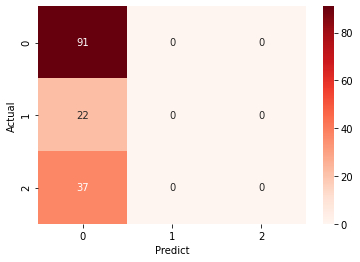

In [240]:
# 오차행렬 시각화 - Scaling 전
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, svc_prediction_before_scale2), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

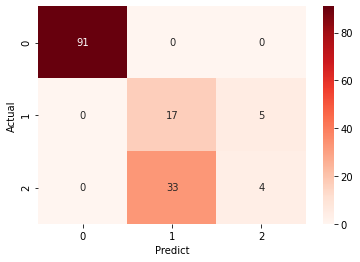

In [241]:
# 오차행렬 시각화 - Scaling 후
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, svc_prediction_after_scaled2), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

 → 결과 : **61% -> 75 %** 의 정확도, Scaling 수행 여부가 정확도에 영향을 미침

- **kernel='linear'**

In [242]:
# Scaling을 수행하지 않고 학습
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_linear_model_before_scale = svm.SVC(kernel='linear')
SVM_linear_model_before_scale.fit(X_train,y_train)

svc_linear_prediction_before_scale = SVM_linear_model_before_scale.predict(X_test)

In [243]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_linear_model_after_scale = svm.SVC(kernel='linear')
SVM_linear_model_after_scale.fit(X_train_scaled,y_train)
svc_linear_prediction_after_scaled = SVM_linear_model_after_scale.predict(X_test_scaled)

In [244]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_linear_prediction_before_scale,y_test))
before_scaling_report = classification_report(y_test,svc_linear_prediction_before_scale)
print(before_scaling_report)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_linear_prediction_after_scaled ,y_test))
after_scaling_report = classification_report(y_test,svc_linear_prediction_after_scaled)
print(after_scaling_report)

SVM accuracy =  0.7733333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.38      0.91      0.54        22
           2       0.71      0.14      0.23        37

    accuracy                           0.77       150
   macro avg       0.70      0.68      0.59       150
weighted avg       0.84      0.77      0.74       150

SVM accuracy =  0.7733333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.38      0.91      0.54        22
           2       0.71      0.14      0.23        37

    accuracy                           0.77       150
   macro avg       0.70      0.68      0.59       150
weighted avg       0.84      0.77      0.74       150



- **kernel="sigmoid"**

In [245]:
# Scaling을 수행하지 않고 학습
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_sigmoid_model_before_scale = svm.SVC(kernel='sigmoid')
SVM_sigmoid_model_before_scale.fit(X_train,y_train)

svc_sigmoid_prediction_before_scale = SVM_sigmoid_model_before_scale.predict(X_test)

In [246]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_sigmoid_model_after_scale = svm.SVC(kernel='sigmoid')
SVM_sigmoid_model_after_scale.fit(X_train_scaled,y_train)
svc_sigmoid_prediction_after_scaled = SVM_sigmoid_model_after_scale.predict(X_test_scaled)

In [247]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_sigmoid_prediction_before_scale,y_test))
before_scaling_report = classification_report(y_test,svc_sigmoid_prediction_before_scale)
print(before_scaling_report)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_sigmoid_prediction_after_scaled ,y_test))
after_scaling_report = classification_report(y_test,svc_sigmoid_prediction_after_scaled)
print(after_scaling_report)

SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150

SVM accuracy =  0.7733333333333333
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        91
           1       0.36      0.68      0.47        22
           2       0.63      0.32      0.43        37

    accuracy                           0.77       150
   macro avg       0.66      0.66      0.63       150
weighted avg       0.81      0.77      0.77       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- **kernel='poly'**

In [248]:
# Scaling을 수행하지 않고 학습
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_poly_model_before_scale = svm.SVC(kernel='poly')
SVM_poly_model_before_scale.fit(X_train,y_train)

svc_poly_prediction_before_scale = SVM_poly_model_before_scale.predict(X_test)

In [249]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_poly_model_after_scale = svm.SVC(kernel='poly')
SVM_poly_model_after_scale.fit(X_train_scaled,y_train)
svc_poly_prediction_after_scaled = SVM_poly_model_after_scale.predict(X_test_scaled)

In [250]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_poly_prediction_before_scale,y_test))
before_scaling_report = classification_report(y_test,svc_poly_prediction_before_scale)
print(before_scaling_report)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_poly_prediction_after_scaled ,y_test))
after_scaling_report = classification_report(y_test,svc_poly_prediction_after_scaled)
print(after_scaling_report)

SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150

SVM accuracy =  0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.37      0.82      0.51        22
           2       0.60      0.16      0.26        37

    accuracy                           0.77       150
   macro avg       0.66      0.66      0.59       150
weighted avg       0.81      0.77      0.74       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **One-hot encoding** 방식으로 training data 변환

In [251]:
# 원본 데이터 불러오기
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI test/loan_payment analysis/Loan payments data_원본.csv")
#df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [252]:
# 사용하지 않을 열 삭제(past_due_days, Loan_ID 제외)
df.drop(['Loan_ID', 'effective_date', 'due_date' , 'paid_off_time'] ,axis = 1, inplace = True)
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,NaN,27,college,male
4,PAIDOFF,1000,30,NaN,28,college,female


In [253]:
#past_due_days 처리
df['past_due_days'].unique()
df["past_due_days"]= df["past_due_days"].fillna(0)
df["past_due_days"]= df["past_due_days"].replace([  76., 61., 75., 60., 59., 74., 29., 44., 58., 73., 28.,  2.,
        4., 13.,  5.,  3., 12., 27.,  1., 25., 24., 36.,  7., 14., 23.,
        6., 38., 19., 52., 51.,  9., 56.,  8.], "1")
df

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,0,45,High School or Below,male
1,PAIDOFF,1000,30,0,50,Bechalor,female
2,PAIDOFF,1000,30,0,33,Bechalor,female
3,PAIDOFF,1000,15,0,27,college,male
4,PAIDOFF,1000,30,0,28,college,female
...,...,...,...,...,...,...,...
495,COLLECTION_PAIDOFF,1000,30,1,28,High School or Below,male
496,COLLECTION_PAIDOFF,1000,15,1,26,High School or Below,male
497,COLLECTION_PAIDOFF,800,15,1,30,college,male
498,COLLECTION_PAIDOFF,1000,30,1,38,college,female


In [254]:
df["loan_status"]= df["loan_status"].replace(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'],["0","1","2"])

In [255]:
df = pd.get_dummies(df, columns = ['education'])
df = pd.get_dummies(df, columns = ['Gender'])

In [256]:
df

,loan_status,Principal,terms,past_due_days,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male
0,0,1000,30,0,45,0,1,0,0,0,1
1,0,1000,30,0,50,1,0,0,0,1,0
2,0,1000,30,0,33,1,0,0,0,1,0
3,0,1000,15,0,27,0,0,0,1,0,1
4,0,1000,30,0,28,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
495,2,1000,30,1,28,0,1,0,0,0,1
496,2,1000,15,1,26,0,1,0,0,0,1
497,2,800,15,1,30,0,0,0,1,0,1
498,2,1000,30,1,38,0,0,0,1,1,0


In [257]:
df.dropna(inplace = True)

In [258]:
# y, 즉 예측값이 loan_status일 때
from sklearn.model_selection import train_test_split

X = df.iloc[1:501,1:].values
y = df.iloc[1:501,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print(X_test)
print(y_train)

[[1000 30 '1' ... 0 0 1]
 [1000 15 0.0 ... 1 0 1]
 [1000 30 0.0 ... 1 0 1]
 ...
 [1000 30 0.0 ... 0 0 1]
 [1000 30 0.0 ... 0 0 1]
 [1000 15 0.0 ... 0 0 1]]
['2' '1' '0' '2' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0'
 '2' '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '2' '0' '1' '0' '0' '0' '1'
 '1' '1' '0' '2' '0' '0' '0' '1' '1' '0' '2' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '2' '0' '0' '0' '2' '0' '0'
 '1' '0' '0' '2' '2' '0' '2' '1' '1' '0' '0' '0' '1' '0' '2' '0' '2' '0'
 '0' '0' '2' '0' '2' '2' '1' '0' '0' '2' '0' '0' '0' '0' '0' '2' '1' '0'
 '1' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '2' '1'
 '1' '1' '0' '1' '0' '2' '0' '0' '2' '1' '1' '1' '0' '1' '2' '1' '2' '0'
 '0' '2' '1' '1' '2' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '2' '0' '2'
 '1' '0' '0' '2' '0' '1' '1' '0' '1' '0' '2' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '2' '1' '0'
 '0' '0' '2' '0' '0' '2' '0' '0' '2' '0' 

In [259]:
# Scaling을 수행하지 않고 학습
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_model_before_scale3 = svm.SVC()
SVM_model_before_scale3.fit(X_train,y_train)

svc_prediction_before_scale3 = SVM_model_before_scale3.predict(X_test)


In [260]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_model_after_scale3 = svm.SVC()
SVM_model_after_scale3.fit(X_train_scaled,y_train)
svc_prediction_after_scaled3 = SVM_model_after_scale3.predict(X_test_scaled)

In [261]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction_before_scale3,y_test))
before_scaling_report3 = classification_report(y_test,svc_prediction_before_scale3)
print(before_scaling_report3)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction_after_scaled3 ,y_test))
after_scaling_report3 = classification_report(y_test,svc_prediction_after_scaled3)
print(after_scaling_report3)


SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150

SVM accuracy =  0.7866666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.40      0.86      0.54        22
           2       0.73      0.22      0.33        37

    accuracy                           0.79       150
   macro avg       0.71      0.69      0.63       150
weighted avg       0.84      0.79      0.77       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


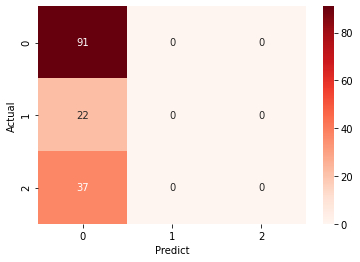

In [262]:
# 오차행렬 시각화 - Scaling 전
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, svc_prediction_before_scale3), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

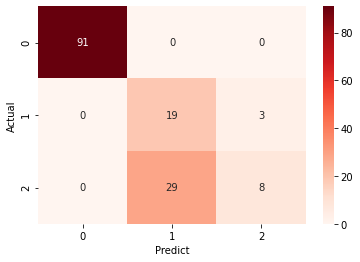

In [263]:
# 오차행렬 시각화 - Scaling 후
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, svc_prediction_after_scaled3), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [264]:
# Scaling 수행 전 데이터셋 정확도
# print("<Scaling 전>")
# print("훈련 세트 정확도: {:.3f}".format(SVM_model_before_scale3.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(SVM_model_before_scale3.score(X_test, y_test)))
# print()
# # Scaling 수행 전 데이터셋 정확도
# print("<Scaling 후>")
# print("훈련 세트 정확도: {:.3f}".format(SVM_model_after_scale3.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(SVM_model_after_scale3.score(X_test, y_test)))

 → 결과 : **61% -> 79 %** 의 정확도, Scaling 후 정확도가 **약 80%**까지 도달함

**- kernel = 'linear'**

In [265]:
# Scaling을 수행하지 않고 학습
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_linear_model_before_scale = svm.SVC(kernel='linear')
SVM_linear_model_before_scale.fit(X_train,y_train)

svc_linear_prediction_before_scale = SVM_linear_model_before_scale.predict(X_test)

In [266]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_linear_model_after_scale = svm.SVC(kernel='linear')
SVM_linear_model_after_scale.fit(X_train_scaled,y_train)
svc_linear_prediction_after_scaled = SVM_linear_model_after_scale.predict(X_test_scaled)

In [267]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_linear_prediction_before_scale,y_test))
before_scaling_report = classification_report(y_test,svc_linear_prediction_before_scale)
print(before_scaling_report)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_linear_prediction_after_scaled ,y_test))
after_scaling_report = classification_report(y_test,svc_linear_prediction_after_scaled)
print(after_scaling_report)

SVM accuracy =  0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.38      0.95      0.55        22
           2       0.75      0.08      0.15        37

    accuracy                           0.77       150
   macro avg       0.71      0.68      0.56       150
weighted avg       0.85      0.77      0.72       150

SVM accuracy =  0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.38      0.95      0.55        22
           2       0.75      0.08      0.15        37

    accuracy                           0.77       150
   macro avg       0.71      0.68      0.56       150
weighted avg       0.85      0.77      0.72       150



**- kernel = 'sigmoid'**

In [268]:
# Scaling을 수행하지 않고 학습
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_sigmoid_model_before_scale = svm.SVC(kernel='sigmoid')
SVM_sigmoid_model_before_scale.fit(X_train,y_train)

svc_sigmoid_prediction_before_scale = SVM_sigmoid_model_before_scale.predict(X_test)

In [269]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_sigmoid_model_after_scale = svm.SVC(kernel='sigmoid')
SVM_sigmoid_model_after_scale.fit(X_train_scaled,y_train)
svc_sigmoid_prediction_after_scaled = SVM_sigmoid_model_after_scale.predict(X_test_scaled)

In [270]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_sigmoid_prediction_before_scale,y_test))
before_scaling_report = classification_report(y_test,svc_sigmoid_prediction_before_scale)
print(before_scaling_report)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_sigmoid_prediction_after_scaled ,y_test))
after_scaling_report = classification_report(y_test,svc_sigmoid_prediction_after_scaled)
print(after_scaling_report)

SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150

SVM accuracy =  0.7466666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       0.35      0.82      0.49        22
           2       0.43      0.08      0.14        37

    accuracy                           0.75       150
   macro avg       0.59      0.63      0.54       150
weighted avg       0.76      0.75      0.71       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   **kernel = 'poly'**



In [271]:
# Scaling을 수행하지 않고 학습
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_poly_model_before_scale = svm.SVC(kernel='poly')
SVM_poly_model_before_scale.fit(X_train,y_train)

svc_poly_prediction_before_scale = SVM_poly_model_before_scale.predict(X_test)

In [272]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_poly_model_after_scale = svm.SVC(kernel='poly')
SVM_poly_model_after_scale.fit(X_train_scaled,y_train)
svc_poly_prediction_after_scaled = SVM_poly_model_after_scale.predict(X_test_scaled)

In [273]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_poly_prediction_before_scale,y_test))
before_scaling_report = classification_report(y_test,svc_poly_prediction_before_scale)
print(before_scaling_report)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_poly_prediction_after_scaled ,y_test))
after_scaling_report = classification_report(y_test,svc_poly_prediction_after_scaled)
print(after_scaling_report)

SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150

SVM accuracy =  0.7933333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.41      0.95      0.58        22
           2       0.88      0.19      0.31        37

    accuracy                           0.79       150
   macro avg       0.76      0.71      0.63       150
weighted avg       0.88      0.79      0.77       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM 모델 내에서 C 값을 증가시켜 복잡한 모델로 학습

In [274]:
# Scaling을 수행하지 않고 학습
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_model_before_scale4 = svm.SVC(C=10.0)
SVM_model_before_scale4.fit(X_train,y_train)

svc_prediction_before_scale4 = SVM_model_before_scale4.predict(X_test)


In [275]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_model_after_scale4 = svm.SVC(C=10.0)
SVM_model_after_scale4.fit(X_train_scaled,y_train)
svc_prediction_after_scaled4 = SVM_model_after_scale4.predict(X_test_scaled)

In [276]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction_before_scale4,y_test))
before_scaling_report4 = classification_report(y_test,svc_prediction_before_scale4)
print(before_scaling_report4)

print('SVM accuracy = ', metrics.accuracy_score(svc_prediction_after_scaled4, y_test))
after_scaling_report4 = classification_report(y_test,svc_prediction_after_scaled4)
print(after_scaling_report4)


SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150

SVM accuracy =  0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.32      0.55      0.41        22
           2       0.55      0.32      0.41        37

    accuracy                           0.77       150
   macro avg       0.62      0.62      0.60       150
weighted avg       0.79      0.77      0.77       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 → 정확도에 차이를 보이지 않는 모습

**- kernel = 'linear'**

In [277]:
# Scaling을 수행하지 않고 학습
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_linear_model_before_scale = svm.SVC(kernel='linear')
SVM_linear_model_before_scale.fit(X_train,y_train)

svc_linear_prediction_before_scale = SVM_linear_model_before_scale.predict(X_test)

In [278]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_linear_model_after_scale = svm.SVC(kernel='linear')
SVM_linear_model_after_scale.fit(X_train_scaled,y_train)
svc_linear_prediction_after_scaled = SVM_linear_model_after_scale.predict(X_test_scaled)

In [279]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_linear_prediction_before_scale,y_test))
before_scaling_report = classification_report(y_test,svc_linear_prediction_before_scale)
print(before_scaling_report)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_linear_prediction_after_scaled ,y_test))
after_scaling_report = classification_report(y_test,svc_linear_prediction_after_scaled)
print(after_scaling_report)

SVM accuracy =  0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.38      0.95      0.55        22
           2       0.75      0.08      0.15        37

    accuracy                           0.77       150
   macro avg       0.71      0.68      0.56       150
weighted avg       0.85      0.77      0.72       150

SVM accuracy =  0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.38      0.95      0.55        22
           2       0.75      0.08      0.15        37

    accuracy                           0.77       150
   macro avg       0.71      0.68      0.56       150
weighted avg       0.85      0.77      0.72       150



**- kernel = 'sigmoid'**

In [280]:
# Scaling을 수행하지 않고 학습
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_sigmoid_model_before_scale = svm.SVC(kernel='sigmoid')
SVM_sigmoid_model_before_scale.fit(X_train,y_train)

svc_sigmoid_prediction_before_scale = SVM_sigmoid_model_before_scale.predict(X_test)

In [281]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_sigmoid_model_after_scale = svm.SVC(kernel='sigmoid')
SVM_sigmoid_model_after_scale.fit(X_train_scaled,y_train)
svc_sigmoid_prediction_after_scaled = SVM_sigmoid_model_after_scale.predict(X_test_scaled)


In [282]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_sigmoid_prediction_before_scale,y_test))
before_scaling_report = classification_report(y_test,svc_sigmoid_prediction_before_scale)
print(before_scaling_report)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_sigmoid_prediction_after_scaled ,y_test))
after_scaling_report = classification_report(y_test,svc_sigmoid_prediction_after_scaled)
print(after_scaling_report)

SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150

SVM accuracy =  0.7466666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       0.35      0.82      0.49        22
           2       0.43      0.08      0.14        37

    accuracy                           0.75       150
   macro avg       0.59      0.63      0.54       150
weighted avg       0.76      0.75      0.71       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**- kernel = 'poly'**

In [283]:
# Scaling을 수행하지 않고 학습
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

SVM_poly_model_before_scale = svm.SVC(kernel='poly')
SVM_poly_model_before_scale.fit(X_train,y_train)

svc_poly_prediction_before_scale = SVM_poly_model_before_scale.predict(X_test)

In [284]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_poly_model_after_scale = svm.SVC(kernel='poly')
SVM_poly_model_after_scale.fit(X_train_scaled,y_train)
svc_poly_prediction_after_scaled = SVM_poly_model_after_scale.predict(X_test_scaled)

In [285]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_poly_prediction_before_scale,y_test))
before_scaling_report = classification_report(y_test,svc_poly_prediction_before_scale)
print(before_scaling_report)

# Scaling 수행 후 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_poly_prediction_after_scaled ,y_test))
after_scaling_report = classification_report(y_test,svc_poly_prediction_after_scaled)
print(after_scaling_report)

SVM accuracy =  0.6066666666666667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        91
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        37

    accuracy                           0.61       150
   macro avg       0.20      0.33      0.25       150
weighted avg       0.37      0.61      0.46       150

SVM accuracy =  0.7933333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.41      0.95      0.58        22
           2       0.88      0.19      0.31        37

    accuracy                           0.79       150
   macro avg       0.76      0.71      0.63       150
weighted avg       0.88      0.79      0.77       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM&Bagging 앙상블 기법으로 학습

In [120]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
estimator = LinearSVC()
n_estimators = 10
n_jobs = 2
SVM_model_before_scale6= BaggingClassifier(base_estimator=estimator,
                          n_estimators=n_estimators,
                          max_samples=1./n_estimators,
                          n_jobs=n_jobs)
SVM_model_before_scale6.fit(X_train,y_train)
svc_prediction_before_scale6 = model.predict(X_test)
# model.predict_proba(X_test)



In [121]:
# Scaling을 수행한 후 학습
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()     # 변형 객체 생성
std_scaler.fit(X_train)           # 훈련데이터의 모수 분포 저장
X_train_scaled = std_scaler.transform(X_train)    # 훈련 데이터 스케일링
X_test_scaled = std_scaler.transform(X_test)      # 테스트 데이터의 스케일링

# 학습
SVM_model_after_scale7 = svm.SVC()
SVM_model_after_scale7.fit(X_train_scaled,y_train)
svc_prediction_after_scaled7 = SVM_model_after_scale7.predict(X_test_scaled)

In [122]:
# Scaling 수행 전 결과
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction_before_scale6,y_test))
before_scaling_report6 = classification_report(y_test,svc_prediction_before_scale6)
print(before_scaling_report6)


print('SVM accuracy = ', metrics.accuracy_score(svc_prediction_after_scaled7 ,y_test))
after_scaling_report7 = classification_report(y_test,svc_prediction_after_scaled7)
print(after_scaling_report7)

SVM accuracy =  0.48
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        91
           1       0.16      0.32      0.21        22
           2       0.00      0.00      0.00        37

    accuracy                           0.48       150
   macro avg       0.26      0.34      0.29       150
weighted avg       0.40      0.48      0.43       150

SVM accuracy =  0.7866666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.40      0.86      0.54        22
           2       0.73      0.22      0.33        37

    accuracy                           0.79       150
   macro avg       0.71      0.69      0.63       150
weighted avg       0.84      0.79      0.77       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 → 결과 : **48% -> 약 79%** 의 정확도
 
 → 앙상블 기법으로 학습시 스케일링이 큰 영향을 미치는 것으로 확인